In [46]:
# Importing necessary modules and codes for the project
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
from pandas import DataFrame

# machine learning package
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#import ggplot
sns.set(rc={'figure.figsize':(20,20)})

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
# figure size in inches
!pip install -U wordcloud
import scipy.stats as ss
from wordcloud import WordCloud


%matplotlib inline

ModuleNotFoundError: No module named 'plotly'

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

# What factors makes a successful app?

&nbsp;

&nbsp;

&nbsp;

&nbsp; 

&nbsp; 

&nbsp; 

&nbsp; 

![alt text](files/google.png)
    
&nbsp;

&nbsp; 

Word count: 1686 words
  
&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp; 

&nbsp;

&nbsp;

&nbsp; 


&nbsp;

**Table Contents**

&nbsp; 

**1. Introduction**
&nbsp;
&nbsp;

**2. Datasets**

&nbsp; 
&nbsp; 
&nbsp;
&nbsp; 
***2.1 Dataset 1 Cleaning***

&nbsp; 
&nbsp; 
&nbsp;
&nbsp;
***2.2 Dataset 2 Cleaning***

&nbsp;
&nbsp; 
&nbsp;
&nbsp;
***2.3 Merging Dataset***

**3. Exploratory Analysis**

&nbsp; 
&nbsp; 
&nbsp;
&nbsp;
***3.1 Variable Correlation***

&nbsp; 
&nbsp;
&nbsp; 
&nbsp;
***3.2 Variable Distribution***

&nbsp; 
&nbsp;
&nbsp; 
&nbsp;
***3.3 Rating Comparing Analysis***
&nbsp; 

**4. Predictive Analysis**

&nbsp; 
&nbsp;
&nbsp; 
&nbsp;
***4.1 Random Forest***

&nbsp;
&nbsp;
&nbsp; 
&nbsp;
***4.2 Linear Regression***
&nbsp; 

**5. App Pricing Analysis**

&nbsp; 
&nbsp;
&nbsp; 
&nbsp;
***5.1 Most Frequent Word in Apps***

&nbsp;
&nbsp;
&nbsp; 
&nbsp;
***5.2 Comparing Free and Paid Apps***

&nbsp;
&nbsp;
&nbsp; 
&nbsp;
***5.3 Price Variation***
&nbsp;

**6. Conclusion**
&nbsp; 

**7. Limitation**
&nbsp;

**8. Reference**
&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


# 1. Introduction 

In recent years, we have seen the time people spend on their mobile devices continually rise. For app developers, this is a great opportunity to create a standout product that can capture the attention of the 3.5 bn smartphone users. However, with so many different applications that have been developed in the 13 years since the first smartphones, the marketplace is extremely competitive (Turner, 2020).

For a new application to be a success, it needs positive App ratings. The effect of app rating is highlighted by research from Apptentive that found that moving from 2 to 3 stars could increase conversion by 306% (Apptentive, 2019). Furthermore, both the App Store and Play Store place a greater level of importance on ratings when deciding how to rank apps in search. 

Through our analysis, we will look to answer the question **' What factors do App creators need to consider when developing a successful app?'**. We first assess which factors creators must consider when developing the app. Then we consider pricing an app as it goes to market. These insights can help developers to build apps that will rank higher and capture more of the Android market!

# 2. Datasets 

We use two sources of data from the Google Playstore:

**Dataset 1**: List of applications with corresponding general information including ratings, reviews, prices, and genres
&nbsp;

**Dataset 2**: List of reveiws for applications with corresponding scoring based quality of reveiw and a sentiment analysis.

 
The data set can be found on Kaggle:
https://www.kaggle.com/neomatrix369/google-play-store-apps-extended

Cleaning steps:
<ol>
 <li>Find and remove null values</li>
 <li>Find and remove duplicates</li>
 <li>Drop columns that are highly correlated or unneeded for analysis</li>
</ol>

## 2.1 Dataset 1 Cleaning

In [6]:
#Display dataset 1
df1 = pd.read_csv('extended_googleplaystore.csv')
"imported Google play store dataset with {0} rows and {1} columns".format(len(df1),len(df1.columns))
df1.head() 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Last Updated (Year),Last Updated (Year/Month),Category (categorical),Type (categorical),Genres (categorical),Current Ver (categorical),Android Ver (categorical),Last Updated (Year/Month) (categorical),No_reviews_count,Reviews_present_count
0,Photo Editor & Candy Camera & Grid & ScrapBook,0.0,4.1,159,19.0,10000.0,0.0,0.0,Everyone,9.0,...,2018,80.0,ART_AND_DESIGN,Free,Art & Design,1.0.0,4.0.3 and up,2018-01,0,0
1,Coloring book moana,0.0,3.9,967,14.0,500000.0,0.0,0.0,Everyone,12.0,...,2018,80.0,ART_AND_DESIGN,Free,Art & Design;Pretend Play,2.0.0,4.0.3 and up,2018-01,14,44
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0.0,4.7,87510,8.7,5000000.0,0.0,0.0,Everyone,9.0,...,2018,87.0,ART_AND_DESIGN,Free,Art & Design,1.2.4,4.0.3 and up,2018-08,0,0
3,Sketch - Draw & Paint,0.0,4.5,215644,25.0,50000000.0,0.0,0.0,Teen,9.0,...,2018,85.0,ART_AND_DESIGN,Free,Art & Design,Varies with device,4.2 and up,2018-06,0,0
4,Pixel Draw - Number Art Coloring Book,0.0,4.3,967,2.8,100000.0,0.0,0.0,Everyone,11.0,...,2018,85.0,ART_AND_DESIGN,Free,Art & Design;Creativity,1.1,4.4 and up,2018-06,0,0


In [7]:
# Checking the number of null values
total_n = df1.isnull().sum().sort_values(ascending=False)
total_n

Rating                                     1463
Size                                       1227
Current Ver (categorical)                     8
Android Ver (categorical)                     2
Type (categorical)                            1
Reviews_present_count                         0
Genres                                        0
Category                                      0
Reviews                                       0
Installs                                      0
Type                                          0
Price                                         0
Content Rating                                0
Current Ver                                   0
Last Updated                                  0
No_reviews_count                              0
Android Ver                                   0
Last Updated (Year)                           0
Last Updated (Year/Month)                     0
Category (categorical)                        0
Genres (categorical)                    

In [8]:
# Dropping the null values
df1.dropna(inplace= True)

We will drop the numeric version of **"Category"**, **"Type" and "Genres"**, and the categorical version of **"Last Updated"**. **"No_reviews_count"** and **"Reviews_present_count"** are dervided from the other variables and are meaningless to be analysed once we already include the original variables. Finally, we are not interested in app version, so **"Current Ver"** and **"Android Ver"** are also removed.

In [9]:
#Dropping unnecessary columns (app versions (we are not interested in)/numeric versions of some categorical variables/factor version of some numeric variables/ derived columns from the original ones)
df1.drop(columns=['Current Ver (categorical)','Android Ver (categorical)', 'Current Ver', 'Android Ver', 'Last Updated','Last Updated (Year)','Category','Type','Last Updated (Year/Month) (categorical)','Genres','No_reviews_count','Reviews_present_count'], inplace = True)
"pruned Google play store dataset with {0} rows and {1} columns".format(len(df1),len(df1.columns))
df1.head()

,App,Rating,Reviews,Size,Installs,Price,Content Rating,Last Updated (Year/Month),Category (categorical),Type (categorical),Genres (categorical)
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,10000.0,0.0,Everyone,80.0,ART_AND_DESIGN,Free,Art & Design
1,Coloring book moana,3.9,967,14.0,500000.0,0.0,Everyone,80.0,ART_AND_DESIGN,Free,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7,5000000.0,0.0,Everyone,87.0,ART_AND_DESIGN,Free,Art & Design
3,Sketch - Draw & Paint,4.5,215644,25.0,50000000.0,0.0,Teen,85.0,ART_AND_DESIGN,Free,Art & Design
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,100000.0,0.0,Everyone,85.0,ART_AND_DESIGN,Free,Art & Design;Creativity


## 2.2 Dataset 2 Cleaning

In [10]:
#Display dataset 2
df2 = pd.read_csv('extended_googleplaystore_user_reviews.csv')
"imported Google play store user reveiws dataset with {0} reviews and {1} columns".format(len(df2),len(df2.columns))
df2.head()

,App,Translated_Review,sentences_count,characters_count,spaces_count,words_count,duplicates_count,chars_excl_spaces_count,emoji_count,whole_numbers_count,...,sentiment_subjectivity,sentiment_subjectivity_summarised,spelling_quality_score,spelling_quality,spelling_quality_summarised,grammar_check_score,grammar_check,original_Sentiment,original_Sentiment_Polarity,original_Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,2.0,122.0,20.0,22.0,6.0,102.0,0.0,1.0,...,Objective/subjective,Objective/subjective,0.875,Bad,Bad,5.0,5 issues,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,1.0,47.0,6.0,7.0,0.0,41.0,0.0,0.0,...,Pretty objective,Objective,1.000,Very good,Good,0.0,No issues,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,1.0,42.0,5.0,6.0,0.0,37.0,0.0,0.0,...,Quite subjective,Subjective,1.000,Very good,Good,0.0,No issues,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,1.0,12.0,2.0,3.0,0.0,10.0,0.0,0.0,...,Pretty objective,Objective,1.000,Very good,Good,1.0,1 issue,Positive,1.00,0.300000


In [17]:
#Check for null values in dataset 2
df2.isnull().sum().sort_values(ascending=False)

grammar_check_score                  0
spelling_quality_summarised          0
spelling_quality_score               0
sentiment_subjectivity_summarised    0
sentiment_subjectivity_score         0
sentiment_polarity_summarised        0
sentiment_polarity_score             0
Translated_Review                    0
App                                  0
dtype: int64

Invalid reveiws take up a large percentage of the dataset, however they are consistent across all columns implying that they can be dropped.

In [18]:
#Drop null values and calculate number of valid reveiws
df2 = df2.dropna(0)
f"Total number valid reviews in the dataset : {len(df2['Translated_Review'])}, this is {(1-(df2['Translated_Review'].isna().sum()/len(df2)))*100:.2f}%  of the total dataset"

'Total number valid reviews in the dataset : 37427, this is 100.00%  of the total dataset'

We used a heatmap to identify correlations between variables

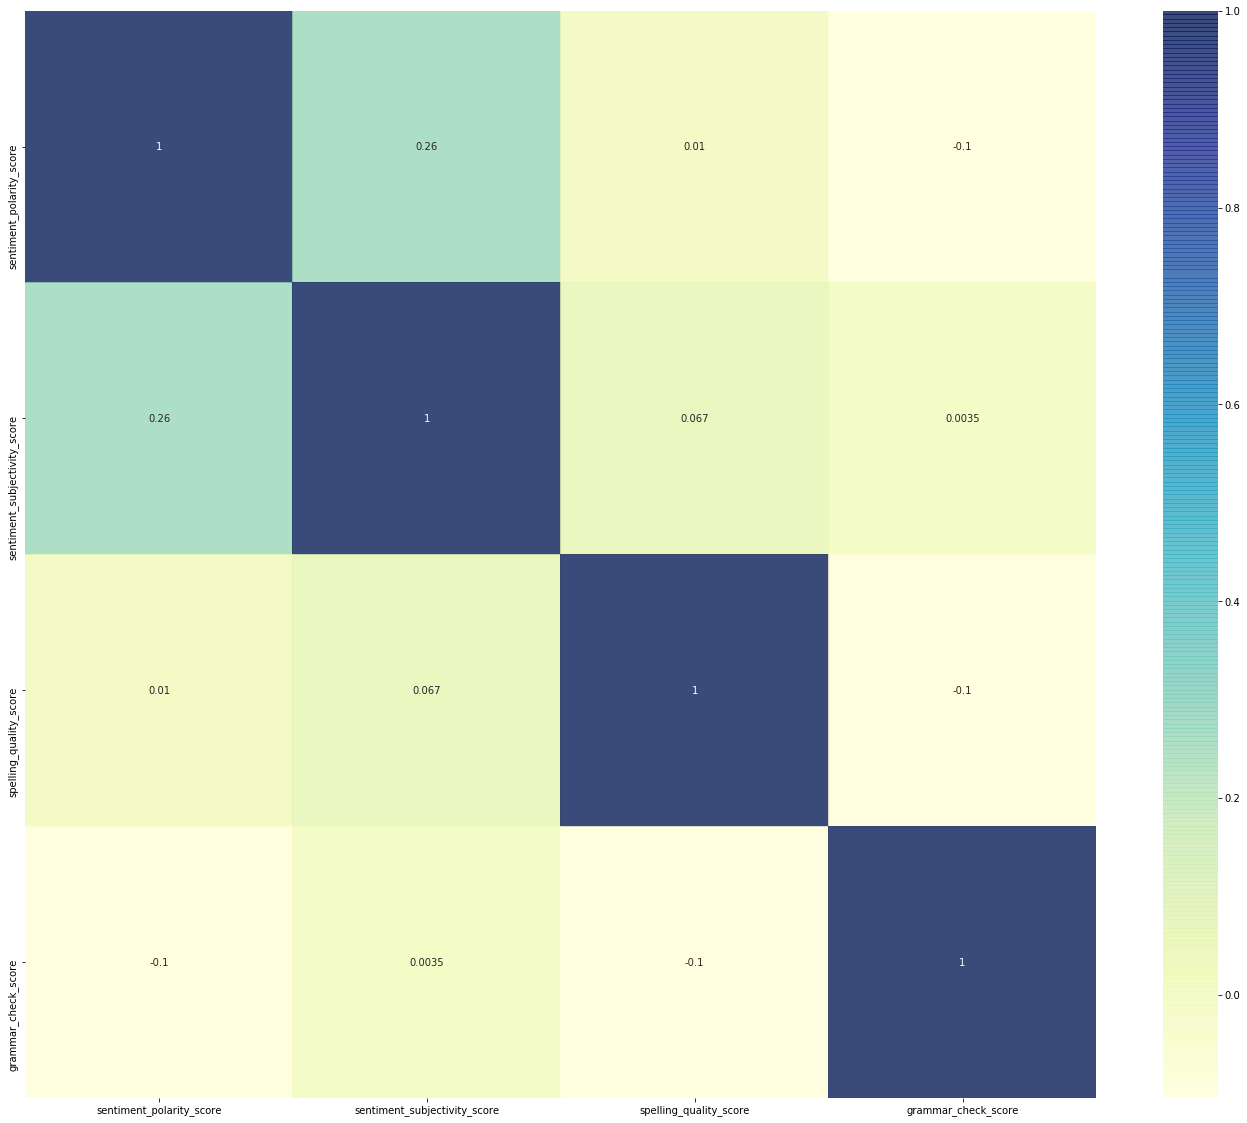

In [19]:
# Correlation Heatmap for Dataset 2 
df3=df2.copy()
corrMatrix1 =df3.corr()
corrMatrix1=corrMatrix1.round(1)
plt.figure(figsize=(24,20))
sns.heatmap(df2.corr(),cmap='YlGnBu',annot=True, alpha=.8)

Highly correlated variables can be removed or merged. We also remove columns that will not be used for later analysis.

In [20]:
#Removing columns from dataset 2
to_drop = ['sentences_count',
           'characters_count',
           'words_count',
           'spaces_count',
           'chars_excl_spaces_count',
           'whole_numbers_count',
           'duplicates_count',
           'alpha_numeric_count',
           'non_alpha_numeric_count',
           'punctuations_count',
           'stop_words_count',
           'dates_count',
           'sentiment_polarity',
           'sentiment_subjectivity',
           'spelling_quality',
           'grammar_check',
           'original_Sentiment',
           'original_Sentiment_Polarity',
           'original_Sentiment_Subjectivity',
           'emoji_count']

df2.drop(to_drop, inplace=True, axis=1)
df2.head(4)

KeyError: "['sentences_count' 'characters_count' 'words_count' 'spaces_count'\n 'chars_excl_spaces_count' 'whole_numbers_count' 'duplicates_count'\n 'alpha_numeric_count' 'non_alpha_numeric_count' 'punctuations_count'\n 'stop_words_count' 'dates_count' 'sentiment_polarity'\n 'sentiment_subjectivity' 'spelling_quality' 'grammar_check'\n 'original_Sentiment' 'original_Sentiment_Polarity'\n 'original_Sentiment_Subjectivity' 'emoji_count'] not found in axis"

## 2.3 Merging Dataset 

We then merge the two datasets to enable analysis of them as a whole. 

Process:
<ol>
 <li>Group apps based on scores and take the mean.</li>
 <li>Use the 'bining' method to attach verbal descriptions and enable understanding of scores.</li>
</ol>


In [21]:
#Determining overall app polarity score for apps
apps_avg_polarity_scores = df2.copy()
apps_avg_polarity_scores = apps_avg_polarity_scores.groupby('App').mean()
apps_avg_polarity_scores = apps_avg_polarity_scores[['sentiment_polarity_score']]
apps_avg_polarity_scores = apps_avg_polarity_scores.reset_index()
apps_avg_polarity = apps_avg_polarity_scores.sort_values('sentiment_polarity_score', ascending=False)
apps_avg_polarity

,App,sentiment_polarity_score
846,HomeWork,1.000000
756,Google Slides,0.933333
435,Daily Workouts - Exercise Fitness Routine Trainer,0.800000
218,Bed Time Fan - White Noise Sleep Sounds,0.781250
330,Cameringo Lite. Filters Camera,0.770269
755,Google Primer,0.750000
700,GPS Map Free,0.700000
701,GPS Speedometer and Odometer,0.687500
221,Best Ovulation Tracker Fertility Calendar App ...,0.595313
13,3D Live Neon Weed Launcher,0.568182


We use pdcut, creating equal-length bins.

In [22]:
#Generating bins for sentiment polarity score
sentiment_catergories = pd.cut(apps_avg_polarity_scores['sentiment_polarity_score'],5, precision=4, labels=['Very Negative',"Negatve",'Neutral','Positive',"Very Positive"])
apps_avg_polarity['sentiment_polarity_category'] =  sentiment_catergories
apps_avg_polarity

,App,sentiment_polarity_score,sentiment_polarity_category
846,HomeWork,1.000000,Very Positive
756,Google Slides,0.933333,Very Positive
435,Daily Workouts - Exercise Fitness Routine Trainer,0.800000,Very Positive
218,Bed Time Fan - White Noise Sleep Sounds,0.781250,Very Positive
330,Cameringo Lite. Filters Camera,0.770269,Very Positive
755,Google Primer,0.750000,Very Positive
700,GPS Map Free,0.700000,Very Positive
701,GPS Speedometer and Odometer,0.687500,Very Positive
221,Best Ovulation Tracker Fertility Calendar App ...,0.595313,Positive
13,3D Live Neon Weed Launcher,0.568182,Positive


We continue this process for all other variables.

In [23]:
#Determine overall reveiws spelling quality score
apps_avg_spelling_scores = df2.copy()
apps_avg_spelling_scores = apps_avg_spelling_scores.groupby('App').mean()
apps_avg_spelling_scores = apps_avg_spelling_scores['spelling_quality_score'].reset_index().sort_values('spelling_quality_score', ascending=False)

In [24]:
#Create and attach bins for apps spelling scores
spelling_catergories = pd.cut(apps_avg_spelling_scores['spelling_quality_score'],3, precision=3, labels=["Bad","Medium","Good"])
apps_avg_spelling_scores['spelling_category'] =  spelling_catergories
apps_avg_spelling_scores.head(5)

,App,spelling_quality_score,spelling_category
293,CBS News,1.0,Good
123,Apartment Decorating Ideas,1.0,Good
846,HomeWork,1.0,Good
93,All-in-One Mahjong 3 FREE,1.0,Good
94,Allegiant,1.0,Good


In [25]:
#Determine apps subjectivity scores
apps_avg_subjectivity_scores = df2.copy()
apps_avg_subjectivity_scores=apps_avg_subjectivity_scores.groupby('App').mean()
apps_avg_subjectivity_scores = apps_avg_subjectivity_scores['sentiment_subjectivity_score'].reset_index().sort_values('sentiment_subjectivity_score',
                                                                                                                      ascending=False)

In [16]:
#Generate apps subjectivity_catergories
#For sentiment subjectivity score we set the bins ourselves due to account for jumps in the data. 
subjectivity_catergories = pd.cut(apps_avg_subjectivity_scores['sentiment_subjectivity_score'], bins=[0,0.2,0.4,0.6,0.8,1], include_lowest=True, labels=['Very Objective',"Objective",'Objective/Subjective','Subjective',"Very Subjective"])
apps_avg_subjectivity_scores['subjectivity_category'] =  subjectivity_catergories
apps_avg_subjectivity_scores.head(5)

,App,sentiment_subjectivity_score,subjectivity_category
756,Google Slides,0.916667,Very Subjective
435,Daily Workouts - Exercise Fitness Routine Trainer,0.750000,Subjective
357,Choice Hotels,0.719206,Subjective
787,HTC Calendar,0.694949,Subjective
837,Hitwe - meet people and chat,0.694105,Subjective


In [26]:
#Determine mean grammer scores
apps_avg_grammer_scores = df2.copy()
apps_avg_grammer_scores = apps_avg_grammer_scores.groupby('App').mean()
apps_avg_grammer_scores = apps_avg_grammer_scores['grammar_check_score'].reset_index().sort_values('grammar_check_score', ascending=False)

In [27]:
#Generate grammer categories 
Grammer_catergories = pd.cut(apps_avg_grammer_scores['grammar_check_score'],
                             bins=[0,1,2,3,4,5], include_lowest=True, 
                             labels=['Very Poor',"Poor",'Medium','Good',"Very Good"])
apps_avg_grammer_scores['grammar_categories'] =  Grammer_catergories
apps_avg_grammer_scores.head(5)

,App,grammar_check_score,grammar_categories
211,BeWild Free Dating & Chat App,4.789474,Very Good
862,Hotstar,4.531250,Very Good
404,Couple - Relationship App,4.086957,Very Good
437,"Dailyhunt (Newshunt) - Latest News, Viral Videos",4.000000,Good
312,Calculator - unit converter,4.000000,Good


In [28]:
#Merge all tables
merged_tables = pd.merge(left=apps_avg_spelling_scores, right=apps_avg_polarity, on='App',how ='inner')
merged_tables = pd.merge(left=merged_tables, right=apps_avg_subjectivity_scores,on='App',how ='inner')
merged_tables = pd.merge(left=merged_tables, right=apps_avg_grammer_scores, left_on='App', right_on='App',how ='inner')
merged_tables = merged_tables.round(decimals=2)
merged_tables.head(5)

,App,spelling_quality_score,spelling_category,sentiment_polarity_score,sentiment_polarity_category,sentiment_subjectivity_score,grammar_check_score,grammar_categories
0,CBS News,1.0,Good,0.00,Neutral,0.00,1.0,Very Poor
1,Apartment Decorating Ideas,1.0,Good,0.24,Neutral,0.20,0.0,Very Poor
2,HomeWork,1.0,Good,1.00,Very Positive,0.30,0.0,Very Poor
3,All-in-One Mahjong 3 FREE,1.0,Good,0.50,Positive,0.60,0.0,Very Poor
4,Allegiant,1.0,Good,0.23,Neutral,0.23,0.0,Very Poor


In [29]:
#Check for duplicate values
merged_tables[merged_tables.duplicated()].count()

App                             0
spelling_quality_score          0
spelling_category               0
sentiment_polarity_score        0
sentiment_polarity_category     0
sentiment_subjectivity_score    0
grammar_check_score             0
grammar_categories              0
dtype: int64

We **'left'** merge the datasets, thus enabling us to keep all the orignal apps in the data set, without loosing those that had not been reveiwed in dataset 2.

In [30]:
#Merge with dataset 1
apps_df_reviews_count_merged = pd.merge(df1, merged_tables, on=['App'], how='left') #Left Merge
apps_df_reviews_count_merged.head(3)

,App,Rating,Reviews,Size,Installs,Price,Content Rating,Last Updated (Year/Month),Category (categorical),Type (categorical),Genres (categorical),spelling_quality_score,spelling_category,sentiment_polarity_score,sentiment_polarity_category,sentiment_subjectivity_score,grammar_check_score,grammar_categories
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,10000.0,0.0,Everyone,80.0,ART_AND_DESIGN,Free,Art & Design,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Coloring book moana,3.9,967,14.0,500000.0,0.0,Everyone,80.0,ART_AND_DESIGN,Free,Art & Design;Pretend Play,0.87,Medium,0.15,Neutral,0.64,0.55,Very Poor
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7,5000000.0,0.0,Everyone,87.0,ART_AND_DESIGN,Free,Art & Design,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Rename some columns for simplicity
apps_df_reviews_count_merged.rename({'Category (categorical)': 'Category'}, axis=1, inplace=True) 
apps_df_reviews_count_merged.rename({'Type (categorical)': 'Type'}, axis=1, inplace=True)
apps_df_reviews_count_merged.rename({'Genres (categorical)': 'Genres'}, axis=1, inplace=True)
apps_df_reviews_count_merged.rename({'Last Updated (Year/Month)': 'Last Updated'}, axis=1, inplace=True)

In [33]:
#create new CSV
apps_df_reviews_count_merged.to_csv(f'googleplaystore_merged.csv', index=False)

# 3. Exploratory Analysis 

In this section, we look at the general makeup of the whole dataset. 
<ol>
 <li>Variable Correlation</li>
 <li>Variable Distribution</li>
 <li>Rating Comparing Analysis</li>
</ol>

In [35]:
#Read new dataset
dfm = pd.read_csv('googleplaystore_merged.csv')
"Merged Google play store dataset with {0} rows and {1} columns".format(len(dfm),len(dfm.columns))
dfm.head(3)
dfm.describe().round(2)

,Rating,Reviews,Size,Installs,Price,Last Updated,spelling_quality_score,sentiment_polarity_score,sentiment_subjectivity_score,grammar_check_score
count,7021.00,7021.00,7021.00,7.021000e+03,7021.00,7021.00,568.00,568.00,568.00,568.00
mean,4.16,144895.99,21.77,4.471804e+06,1.17,76.88,0.89,0.20,0.49,1.30
std,0.56,1024427.85,22.73,2.714908e+07,18.21,13.94,0.04,0.16,0.08,0.83
min,1.00,1.00,0.01,1.000000e+00,0.00,0.00,0.67,-0.38,0.00,0.00
25%,4.00,84.00,4.90,1.000000e+04,0.00,73.00,0.87,0.09,0.45,0.67
50%,4.30,1546.00,13.00,1.000000e+05,0.00,83.00,0.90,0.20,0.50,1.12
75%,4.50,26587.00,31.00,1.000000e+06,0.00,86.00,0.92,0.31,0.54,1.79
max,5.00,44891723.00,100.00,1.000000e+09,400.00,87.00,1.00,1.00,0.69,4.79


In [36]:
# Dataset Information
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 18 columns):
App                             7021 non-null object
Rating                          7021 non-null float64
Reviews                         7021 non-null int64
Size                            7021 non-null float64
Installs                        7021 non-null float64
Price                           7021 non-null float64
Content Rating                  7021 non-null object
Last Updated                    7021 non-null float64
Category                        7021 non-null object
Type                            7021 non-null object
Genres                          7021 non-null object
spelling_quality_score          568 non-null float64
spelling_category               568 non-null object
sentiment_polarity_score        568 non-null float64
sentiment_polarity_category     568 non-null object
sentiment_subjectivity_score    568 non-null float64
grammar_check_score             568 non-nul

## 3.1 Variable Correlation

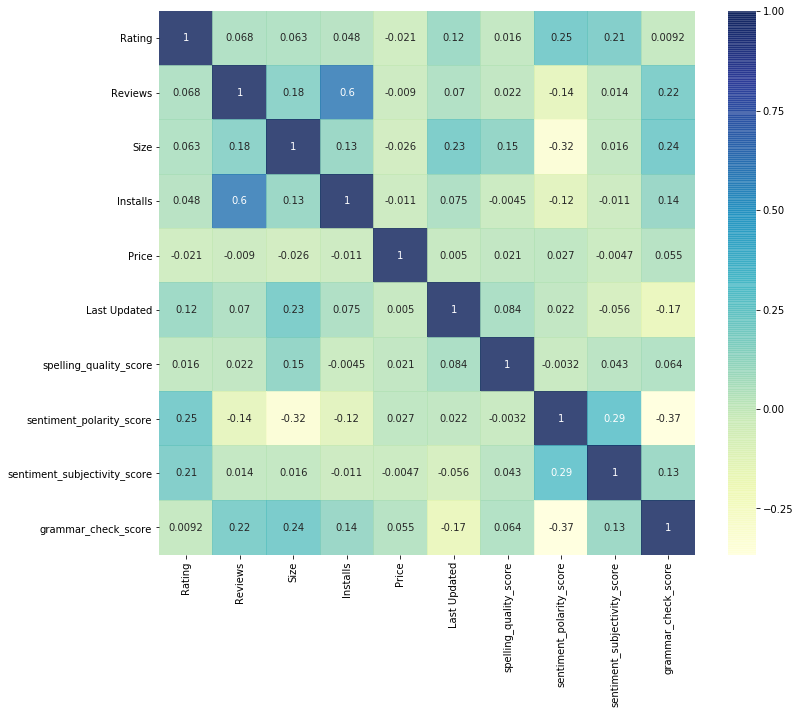

In [37]:
plt.figure(figsize=(12,10))
dfm1=dfm.copy()
sns.heatmap(dfm1.corr(),cmap ="YlGnBu",annot=True, alpha=.8)

The correlations between rating and other variables are quite small, indicating potential nonlinear relationships. Number of reviews and installs are positively correlated (correlation=0.6). This is intuitive as more reviews will be written when the number of installs increases.

## 3.2 Variable Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1266f0f3a0>,
      dtype=object)

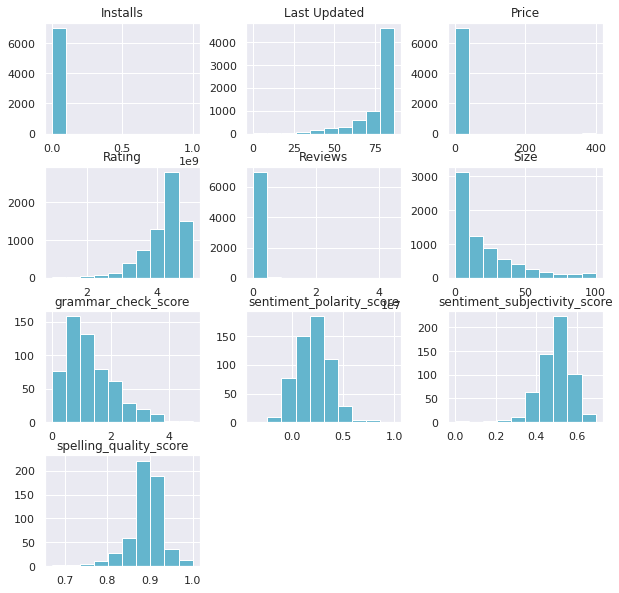

In [27]:
dfm.hist(color="c", figsize=(10, 10))

Last updated and size are extremely skewed. Price, installs, and reviews mainly cluster around certain values.

### Distribution of Apps per Category

In [28]:
#Number of Apps per category 
number_of_apps_in_category = dfm['Category'].value_counts().sort_values(ascending=True)
# number_of_apps_in_category
data1 = [go.Pie(
        labels = number_of_apps_in_category.index,
        values = number_of_apps_in_category.values,
        hoverinfo = 'label+value')]

mylayout = go.Layout(
    title="Proportion of apps for each type of category"
)

fig = go.Figure(data=data1, layout=mylayout)

plotly.offline.iplot(fig,filename='active_category')


### Distribution of Apps per Content Rating 

In [29]:
#Number of Apps per content rating
number_of_apps_in_content = dfm['Content Rating'].value_counts().sort_values(ascending=True)
# number_of_apps_in_content

data2 = [go.Pie(
        labels = number_of_apps_in_content.index,
        values = number_of_apps_in_content.values,
        hoverinfo = 'label+value')]
mylayout = go.Layout(
    title="Proportion of apps for each type of content rating"
)

fig = go.Figure(data=data2, layout=mylayout)

plotly.offline.iplot(fig,filename='active_content')

### Distribution of Response Rating 

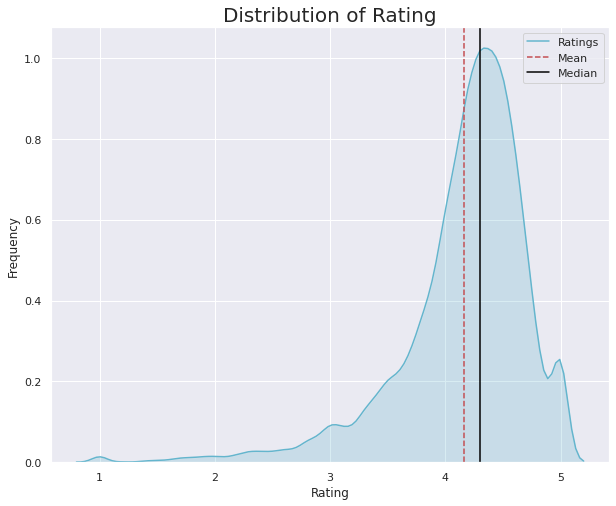

In [30]:
# Distribution of ratings
mean = round(dfm['Rating'].mean(), 2)
median = round(dfm['Rating'].median(), 2)
rcParams['figure.figsize'] = 10,8
g = sns.kdeplot(dfm.Rating, color="c", shade = True)
g.axvline(mean, color='r', linestyle='--')
g.axvline(median, color='black', linestyle='-')
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)
plt.legend({'Ratings': dfm.Rating, 'Mean':mean,'Median':median})

We see here that the spread of ratings is inconsistent from 1-5, instead ratings are highly centred between ratings 3.5 and 5.

## 3.3 Rating Comparing Analysis

### Rating vs Reviews 

Text(0, 0.5, 'Rating')

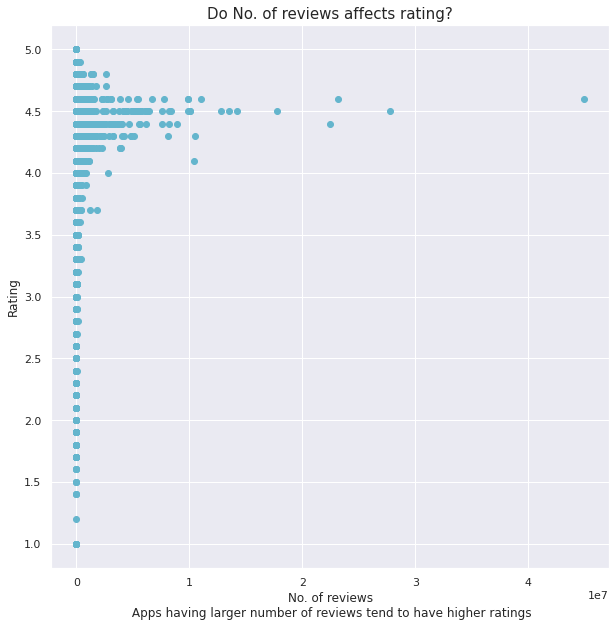

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(dfm['Reviews'],dfm['Rating'],color = 'c', linestyle = '-')
plt.title('Do No. of reviews affects rating?', fontsize=15)
plt.xlabel('No. of reviews\n Apps having larger number of reviews tend to have higher ratings')
plt.ylabel('Rating')

### Rating vs Installs 

Text(0, 0.5, 'Rating')

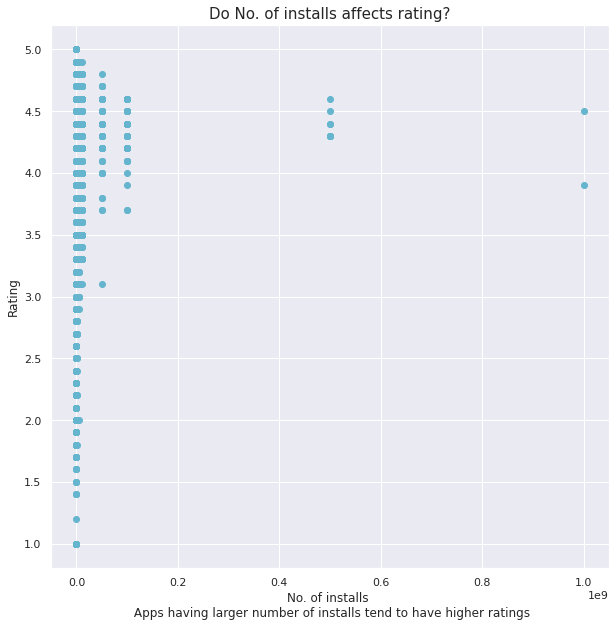

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(dfm['Installs'],dfm['Rating'],color = 'c', linestyle = '-')
plt.title('Do No. of installs affects rating?', fontsize=15)
plt.xlabel('No. of installs \n Apps having larger number of installs tend to have higher ratings')
plt.ylabel('Rating')

### Rating vs Size 

Text(0, 0.5, 'Rating')

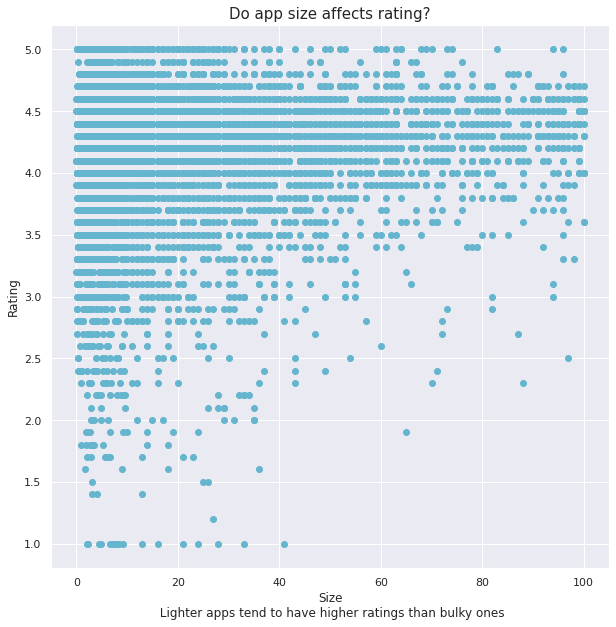

In [33]:
plt.figure(figsize=(10,10))
plt.scatter(dfm['Size'],dfm['Rating'],color = 'c', linestyle = '-')
plt.title('Do app size affects rating?', fontsize=15)
plt.xlabel('Size\n Lighter apps tend to have higher ratings than bulky ones')
plt.ylabel('Rating')

### Rating vs Last Updated

Text(0, 0.5, 'Rating')

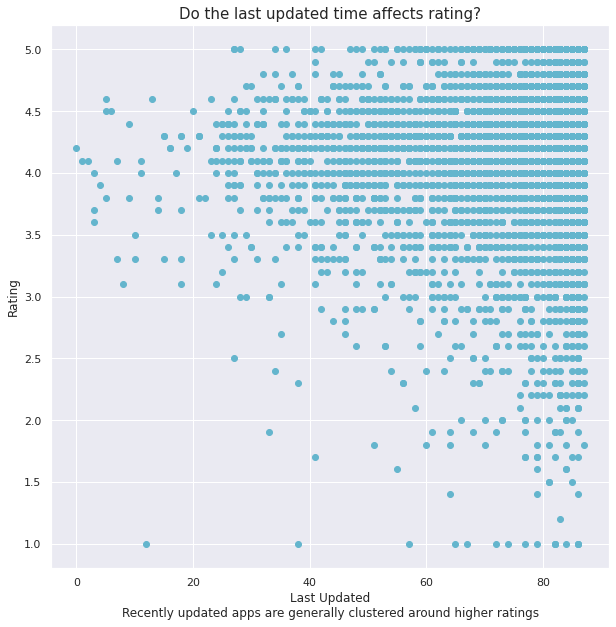

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(dfm['Last Updated'],dfm['Rating'],color = 'c', linestyle = '-')
plt.title('Do the last updated time affects rating?', fontsize=15)
plt.xlabel('Last Updated\nRecently updated apps are generally clustered around higher ratings')
plt.ylabel('Rating')